Fong Ken Rui

### Problem constant growth

<!-- [lab5:prob:constant] -->

Note that though the daisy growth rate per unit time depends on the amount of available fertile land, it is not
otherwise coupled to the environment (i.e. $\beta_i$ is not a function of temperature. Making the growth a function of bare ground, however, keeps the daisy population bounded and the daisy population will eventually reach some steady state.  The next python cell has a script that runs a fixed timestep Runge Kutte routine that calculates area coverage of white and black daisies for fixed growth rates $\beta_w$ and $\beta_b$. Try changing these growth rates (specified in the derivs5 routine) and the initial white and black concentrations (specified in the fixed_growth.yaml file
discussed next).

1.  For a given set of growth rates try various (non-zero) initial daisy
    populations.

2.  For a given set of initial conditions try various growth rates. In
    particular, try rates that are both greater than and less than the
    death rate.

3.  Can you determine when non-zero steady states are achieved? Explain.


<a name="sec_growth"></a>

### Running the constant growth rate demo

In the appendix we discuss the design of the integrator class and the adaptive Runge-Kutta routine.  For this demo, we need to be able to change variables in the configuration file.  For this demonstration you are asked to:

1.  Change the inital white and black daisy concentrations by changing these lines in the [fixed_growth.yaml](https://github.com/rhwhite/numeric_2022/blob/main/notebooks/lab5/fixed_growth.yaml#L13-L15) input file (you can find this file in this lab directory):

    ```yaml

       initvars:
          whiteconc: 0.2
          blackconc: 0.7
    ```

2.  Change the white and black daisy growth rates by editing the variables beta_w and beta_b in the derivs5 routine in the next cell

To hand in: plot graphs to illustrate how these changes have affected the fractional coverage of black and white daisies over time compared to the original. Comment on the changes that you see.

The Integrator class contains two different timeloops, both of which use embedded Runge Kutta Cash Carp
code given in Lab 4 and coded here as [rkckODE5](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L70).  The simplest way to loop through the timesteps is just to call the integrator with a specified set of times.  This is done in [timeloop5fixed](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L244).  Below we will describe how to use the error extimates returned by rkckODE5 to tune the size of the timesteps, which is done in [timeloop5Err](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L244).

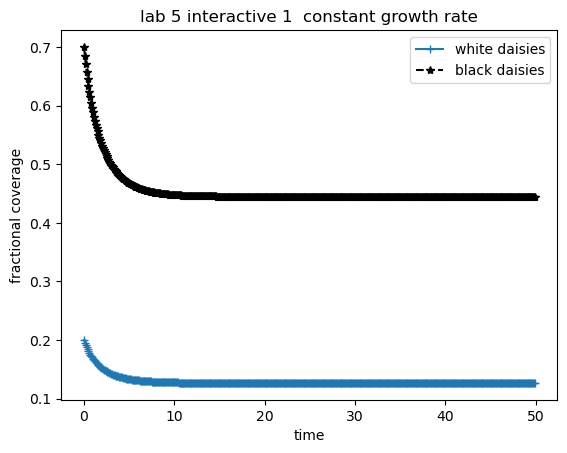

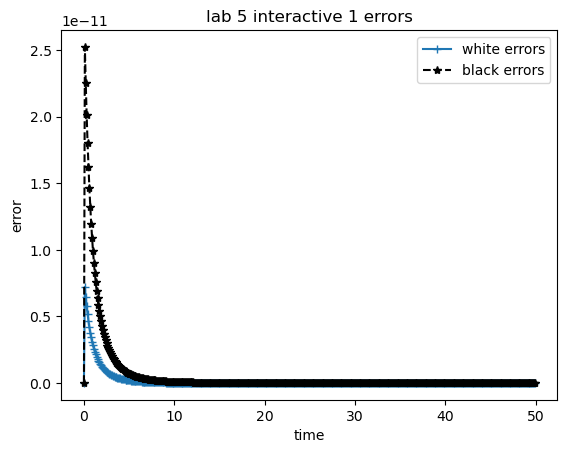

In [8]:
#
# 4.1  integrate constant growth rates with fixed timesteps
#
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

# 0.7 beta 

class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies

           Constant growty rates for white
           and black daisies beta_w and beta_b

           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.7  # growth rate for black daisies
        beta_w = 0.7  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

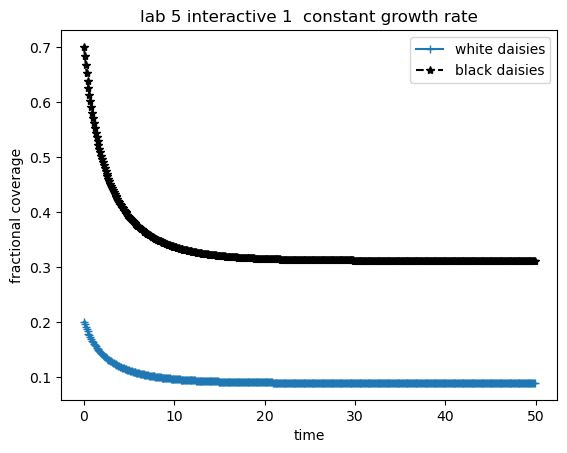

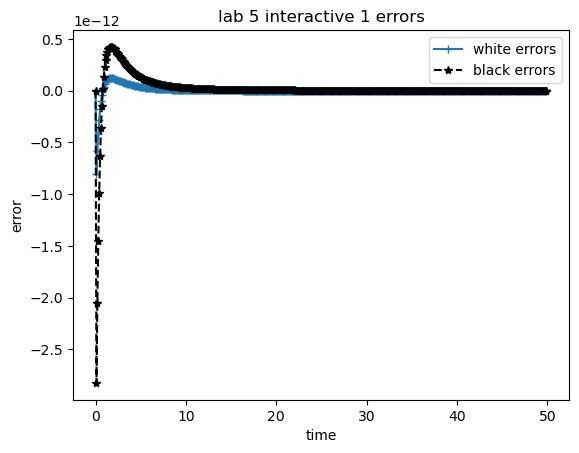

In [9]:
# 0.5 beta

class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies

           Constant growty rates for white
           and black daisies beta_w and beta_b

           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.5  # growth rate for black daisies
        beta_w = 0.5  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

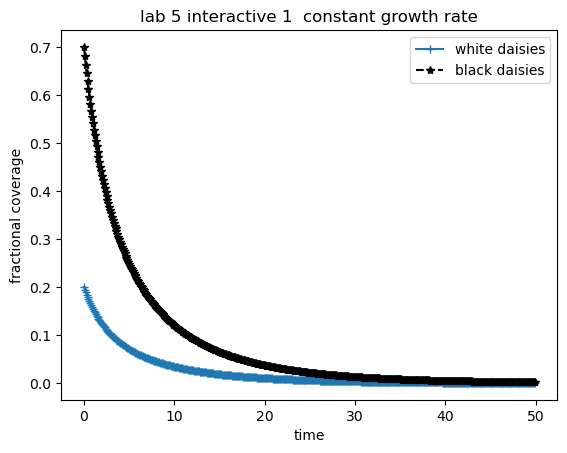

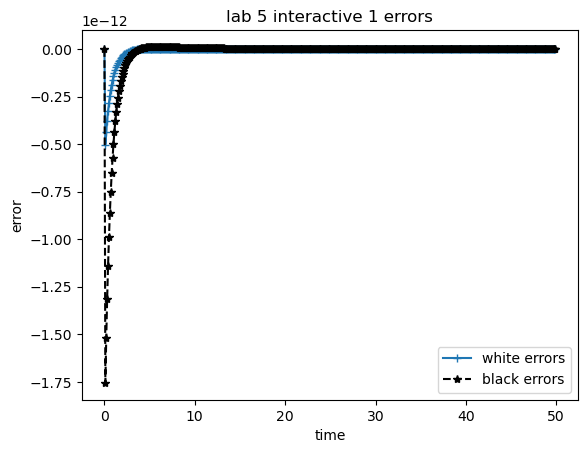

In [10]:
# 0.2 beta

class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies

           Constant growty rates for white
           and black daisies beta_w and beta_b

           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.2  # growth rate for black daisies
        beta_w = 0.2  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

As growth rate for both black and white daisies decreases, the steady state population of black and white daisies decreases. Past a certain point (beta=0.2), the growth rate of daisies fall below their death rate and their population drops to zero over time instead of stabilizing at a finite value.

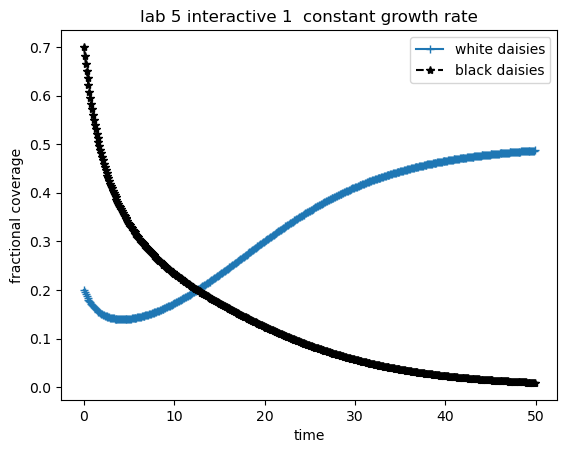

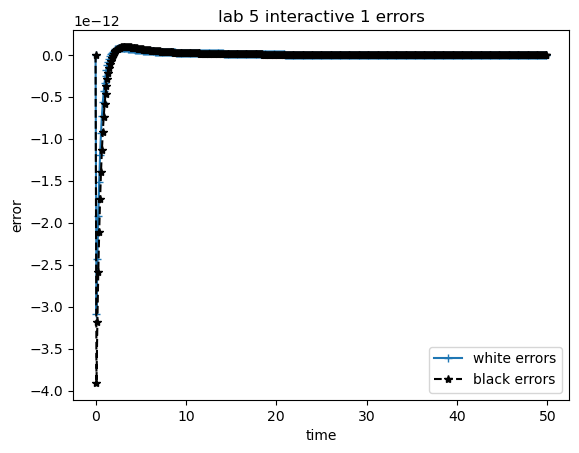

In [12]:
# Higher white growth rate than black

class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies

           Constant growty rates for white
           and black daisies beta_w and beta_b

           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.4  # growth rate for black daisies
        beta_w = 0.6  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

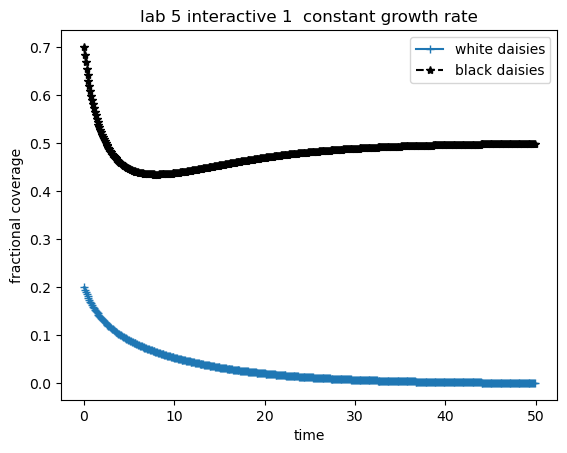

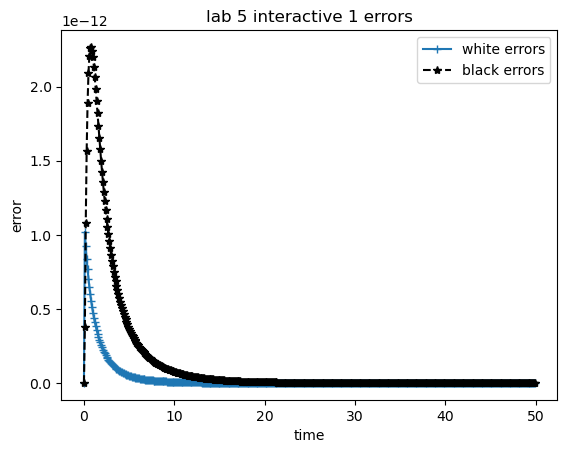

In [13]:
# Higher white growth rate than black

class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies

           Constant growty rates for white
           and black daisies beta_w and beta_b

           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.6  # growth rate for black daisies
        beta_w = 0.4  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

When the growth rates for black or white daisies are adjusted such that one is higher than the other, the daisy with the higher growth rate tends to outcompete the other by taking up most of the available space, thus limiting the growth rate of the other daisy type. This limitation might be severe enough that the other daisy type's reproduct rate falls below the replacement level, causing its population to drop to zero over time.

### Problem Initial
The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

1.  Add a small initial fraction of black daisies (say, 0.01) to the
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?

2.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.

In [31]:
# functions for problem initial
from numlabs.lab5.lab5_funs import Integrator


class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions

            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

temp_w= [315.30710523 315.28209314]
temp_b= [324.91908158 324.89622455]
temp_e= [320.22381474 320.19668091]


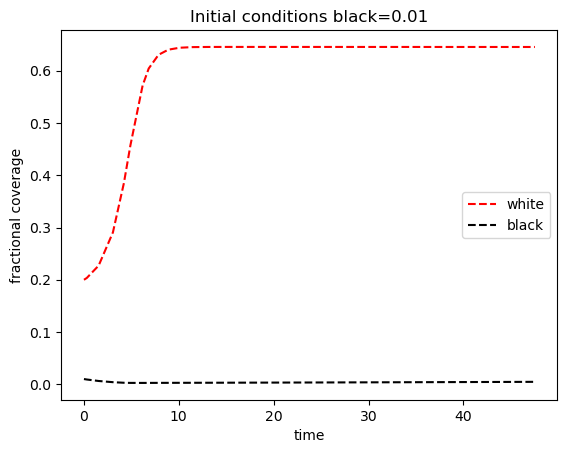

In [52]:
# Solve and plot for problem initial
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial.yaml')
timevals, yvals, errorlist = theSolver.timeloop5Err()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])
temp_w, temp_b, temp_e = theSolver.find_temp(yvals)
print("temp_w=",temp_w)
print("temp_b=",temp_b)
print("temp_e=",temp_e)

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Initial conditions black=0.01')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')


In [42]:
daisies['black'].mean()

0.004250433681174635

The final population of black daisies is nonzero. The equilibrium temperature is only negligibly impacted by the introduction of a small amount of black daisies, though technically we expect there to be a small corresponding increase in temp_b given a higher steady-state proportion of black daisies, all else being equal.

temp_w= [315.36100312 315.28779338]
temp_b= [324.96833768 324.9014336 ]
temp_e= [320.28228324 320.20286473]


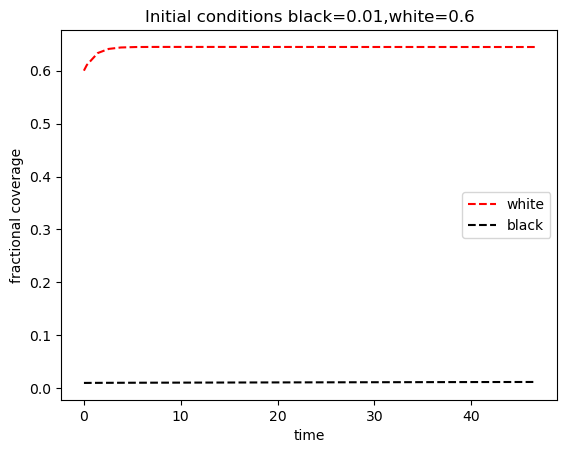

In [53]:
theSolver = Integ54('initial2.yaml')
timevals, yvals, errorlist = theSolver.timeloop5Err()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])
temp_w, temp_b, temp_e = theSolver.find_temp(yvals)
print("temp_w=",temp_w)
print("temp_b=",temp_b)
print("temp_e=",temp_e)

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Initial conditions black=0.01,white=0.6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')


In [46]:
daisies['black'].mean()

0.010792035616259665

The proportion of white daisies need to be increased to increase the proportion of steady-state black daisies. This is because a greater proportion of white daisies increases the planetary albedo and decreases the overall temperature, making it more favourable for black daisies to grow. 

temp_w= [314.792049   315.27506246]
temp_b= [324.44852751 324.88979975]
temp_e= [319.6649778  320.18905375]


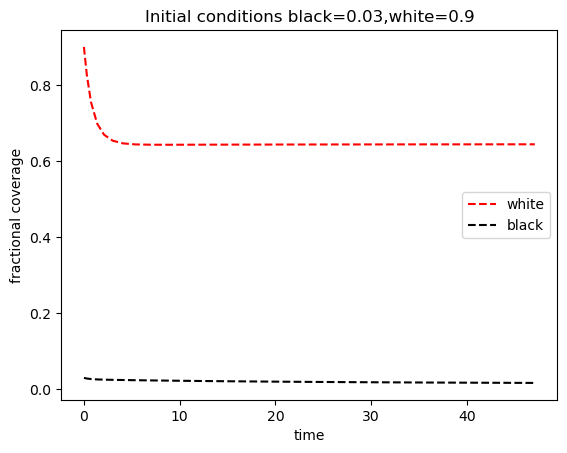

In [61]:
theSolver = Integ54('initial3.yaml')
timevals, yvals, errorlist = theSolver.timeloop5Err()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])
temp_w, temp_b, temp_e = theSolver.find_temp(yvals)
print("temp_w=",temp_w)
print("temp_b=",temp_b)
print("temp_e=",temp_e)

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('Initial conditions black=0.03,white=0.9')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

In [62]:
daisies['black'].mean()

0.022562030429514206

In general, a small population of black daisies requires a much larger proportion of white daisies to offset the heating effect it introduces.

### Problem adaptive
The demos in the previous section solved the Daisyworld equations using the embedded Runge-Kutta methods with adaptive timestep control.

1.  Run the code and find solutions of Daisyworld with the default settings found in adapt.yaml using the timeloop5Err adaptive code

2.  Find the solutions again but this time with fixed stepsizes and compare the size of the timesteps and number of the timesteps.

3.  How much faster does the fixed timeloop need to be to give the same performance as the adaptive timeloop for this case?

<a name="sec_steady"></a>


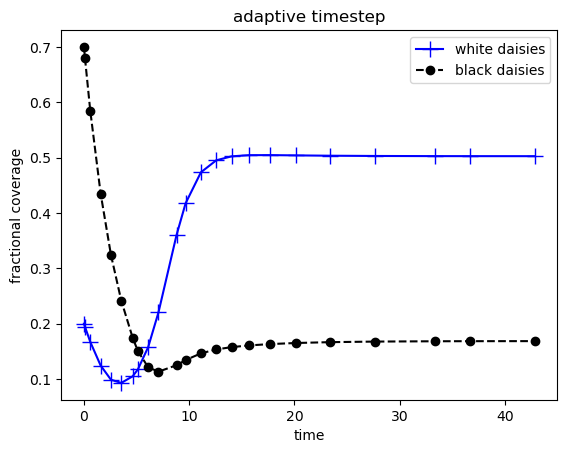

In [86]:
theSolver = Integ54('adapt.yaml')
timeVals, yVals, errorList = theSolver.timeloop5Err()

yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theAx.set_title('adaptive timestep')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]

timevals_adaptive = timeVals

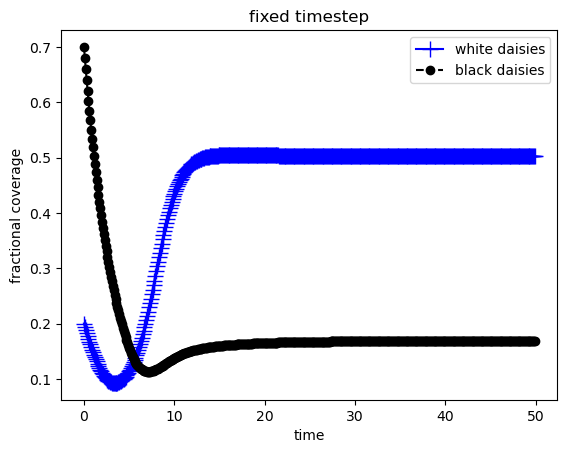

In [87]:
theSolver = Integ54('adapt.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theAx.set_title('fixed timestep')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]

timevals_fixed = timeVals

In [88]:
adaptive_len = len(timevals_adaptive)
fixed_len = len(timevals_fixed)
print("adaptive:", adaptive_len, ", fixed:", fixed_len)

adaptive: 23 , fixed: 500


Text(0, 0.5, 'stepsize')

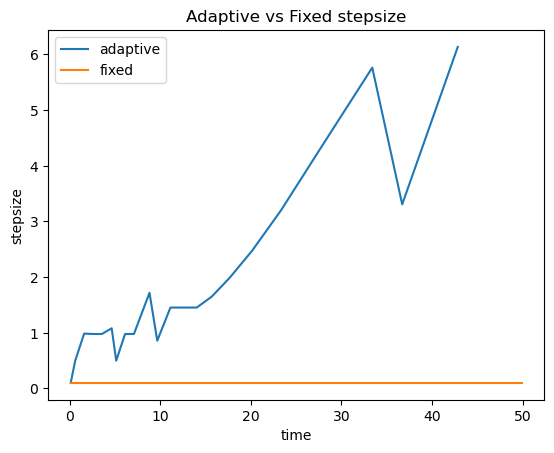

In [89]:
adaptive_stepsize = np.diff(timevals_adaptive)
fixed_stepsize = np.diff(timevals_fixed)
plt.plot(timevals_adaptive[1:], adaptive_stepsize, label='adaptive')
plt.plot(timevals_fixed[1:], fixed_stepsize, label='fixed')
plt.legend()
plt.title("Adaptive vs Fixed stepsize")
plt.xlabel("time")
plt.ylabel("stepsize")

The fixed timeloop needs to run about 20 times faster than the adaptive timeloop to be comparable in performance.